# Google TimesFM Model for Stock Price Prediction

This notebook demonstrates the use of Google's TimesFM (Time Series Foundation Model) for predicting TSLA stock prices.

**Reference**: https://huggingface.co/google/timesfm-1.0-200m

**Requirements**: Python 3.12, Jupyter kernel with TimesFM

In [1]:
# Ensure project root is on sys.path for `import models`
import sys, os
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)


In [2]:
from models.timesfm_nvda import main as timesfm_nvda_main

=== TimesFM Forecast Runner ===

=== TimesFM Configuration (96-day context) ===


Configuration:
   Training start: 2025-02-01
   Prediction days: 5
Training data length: 96
Testing data length: 5
🧪 Training period: 2025-02-03 → 2025-06-20
🧾 Test period: 2025-06-23 → 2025-06-27
🚀 Initializing TimesFM model...
 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.10.17 | packaged by conda-forge | (main, Apr 10 2025, 22:23:34) [Clang 18.1.8 ].
✓ TimesFM imported successfully


Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 32870.72it/s]


✓ TimesFM model initialized successfully
Using actual TimesFM model for prediction...
Processing dataframe with multiple processes.
 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.10.17 | packaged by conda-forge | (main, Apr 10 2025, 22:23:34) [Clang 18.1.8 ].
Finished preprocessing dataframe.
Finished forecasting.
✓ TimesFM forecast completed successfully
🔮 Prediction period: 2025-06-21 → 2025-06-25
Plot saved to /Users/hwang-yejin/Desktop/Financial Time Series Forecasting with Deep Learning Models and Social Media Sentiment/results/NVDA_TimesFM_forecast.png


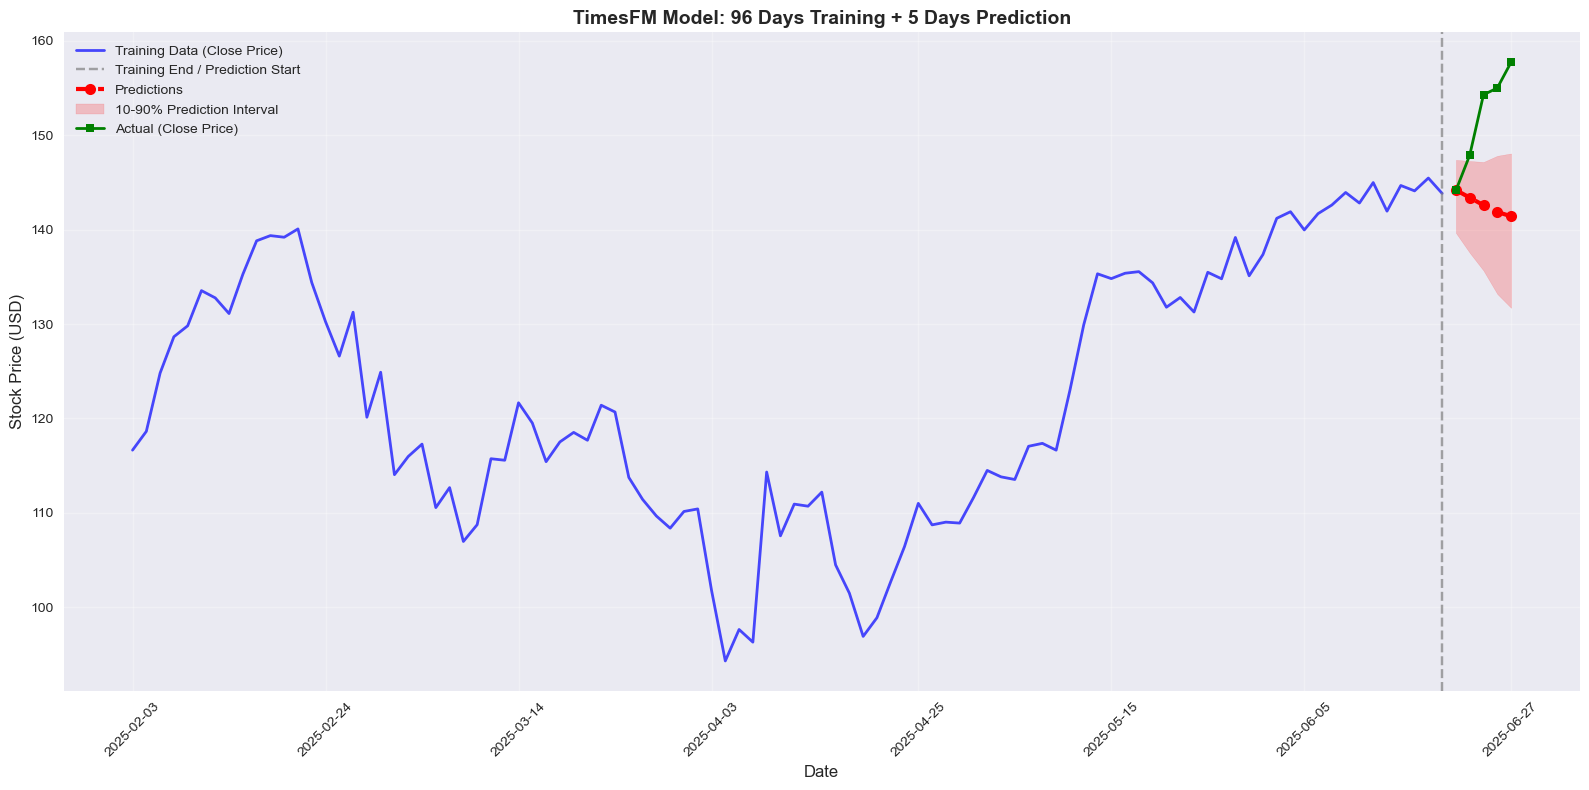

Forecast Performance Metrics:
MAE:  6.82
MSE:  68.19
RMSE: 8.26
MAPE: 4.50%
DA:   0.000
Results saved to matrix successfully!
                    MAE         MSE       RMSE      MAPE   DA
ARIMA          4.970876   43.679190   6.609023  3.261838  0.0
TimesFM        6.822006   68.188286   8.257620  4.501396  0.0
Chronos        7.102666   70.669240   8.406500  4.592989  0.0
TFT_baseline  14.211411  206.403961  14.366766  9.359686  0.0
TFT_Reddit     1.570996    3.020256   1.737888  1.042732  1.0
Total execution time: 19.45 seconds


In [3]:
import time

start_time = time.time()
timesfm_nvda_main(interactive=True, use_model=True)
end_time = time.time()
print(f"Total execution time: {end_time - start_time:.2f} seconds")

execution_time = end_time - start_time

In [4]:
# Save/append execution time to a unified matrix under results/
import os, pickle, pathlib
import pandas as pd

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
results_dir = os.path.join(PROJECT_ROOT, 'results')
os.makedirs(results_dir, exist_ok=True)

ticker = 'NVDA'
model_name = 'TimesFM'
pkl_path = pathlib.Path(results_dir) / f'{ticker}_execution_time.pkl'
csv_path = pathlib.Path(results_dir) / f'{ticker}_execution_time_matrix.csv'

# Ensure execution_time exists
try:
  execution_time
except NameError:
  execution_time = None

if execution_time is None:
  print('⚠️ execution_time is not defined; skipped saving.')
else:
  # Load existing
  try:
    if pkl_path.exists():
      with open(pkl_path, 'rb') as f:
        exec_df = pickle.load(f)
    else:
      exec_df = pd.DataFrame(columns=['Execution Time'])
  except Exception:
    exec_df = pd.DataFrame(columns=['Execution Time'])

  # Append/update row
  exec_df.loc[model_name] = [execution_time]

  # Save
  with open(pkl_path, 'wb') as f:
    pickle.dump(exec_df, f)
  exec_df.to_csv(csv_path, index=True)

  print('\nTotal Execution Time Matrix:')
  print(exec_df)



Total Execution Time Matrix:
                           Execution Time
ARIMA                            9.835926
TimesFM                         19.448323
Chronos                         13.555188
TFT_baseline                    49.900816
TFT_with_Reddit_Sentiment      216.660867


## Model Configuration Notes

- **per_core_batch_size**: Number of samples processed at once
  - Larger = faster but needs more memory
  - Local GPU → 2~4 is safe, Colab → up to 32 is good
- **horizon_len**: Can be any number
- **context_len**: Must be a multiple of 32
- **frequency_input**: 
  - 0: High frequency (daily, hourly, etc.)
  - 1: Medium frequency (weekly, monthly)
  - 2: Low frequency (quarterly, yearly)

## Forecast Interpretation

The forecast results include:
- **timesfm**: Median prediction (most likely value)
- **timesfm-q-0.1**: 10% quantile (lower uncertainty bound)
- **timesfm-q-0.5**: 50% quantile (same as median)
- **timesfm-q-0.9**: 90% quantile (upper uncertainty bound)